In [13]:
import torch
import pandas as pd
from metrics import get_total_metrics
from graphics import get_heatmap, get_differential_heatmap, get_pairs_heatmap, get_combined_mean_variance_heatmap

# Best baseline model
## Metrics calculating

In [57]:
drug_target_data = pd.read_csv('../analysis/kiba_d_t_aff_smiles_split.csv')
test_data = drug_target_data[drug_target_data['split'] == 2] 
del test_data['split']

In [ ]:
test_data.head()

In [43]:
pred_DTI_best_baseline = torch.load('../analysis/DTI_vary_all_train_best_1404')

In [ ]:
test_data.insert(4, 'predicted', pred_DTI_best_baseline)
test_data.head()

In [45]:
test_data.to_csv('../analysis/DTI_vary_all_train_best_1404_preds.csv', index=False)

In [ ]:
results = get_total_metrics(test_data, threshold_affinity=[0, 1, 1.5, 2, 2.5, 3, 3.5, 4], threshold_similarity=[0, 0.1, 0.3, 0.5, 0.7, 0.9])

In [ ]:
results.to_csv('../analysis/DTI_vary_all_train_best_1404_metrics.csv', index=False)
results.head()

## Heatmaps

In [24]:
results_kiba_best_baseline = pd.read_csv('../analysis/DTI_vary_all_train_best_1404_metrics.csv')

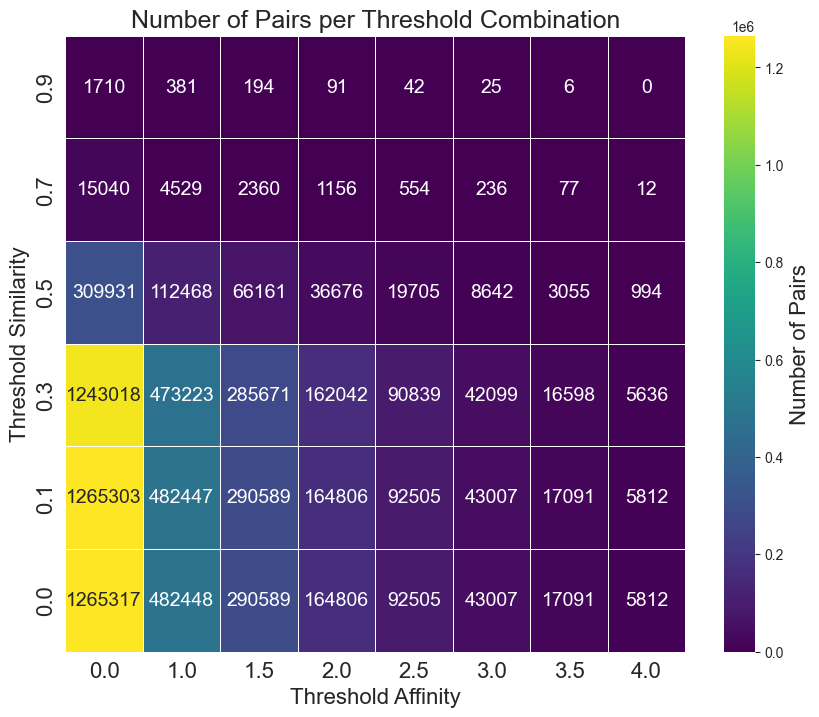

In [21]:
get_pairs_heatmap(results_kiba_best_baseline, 'DTI')

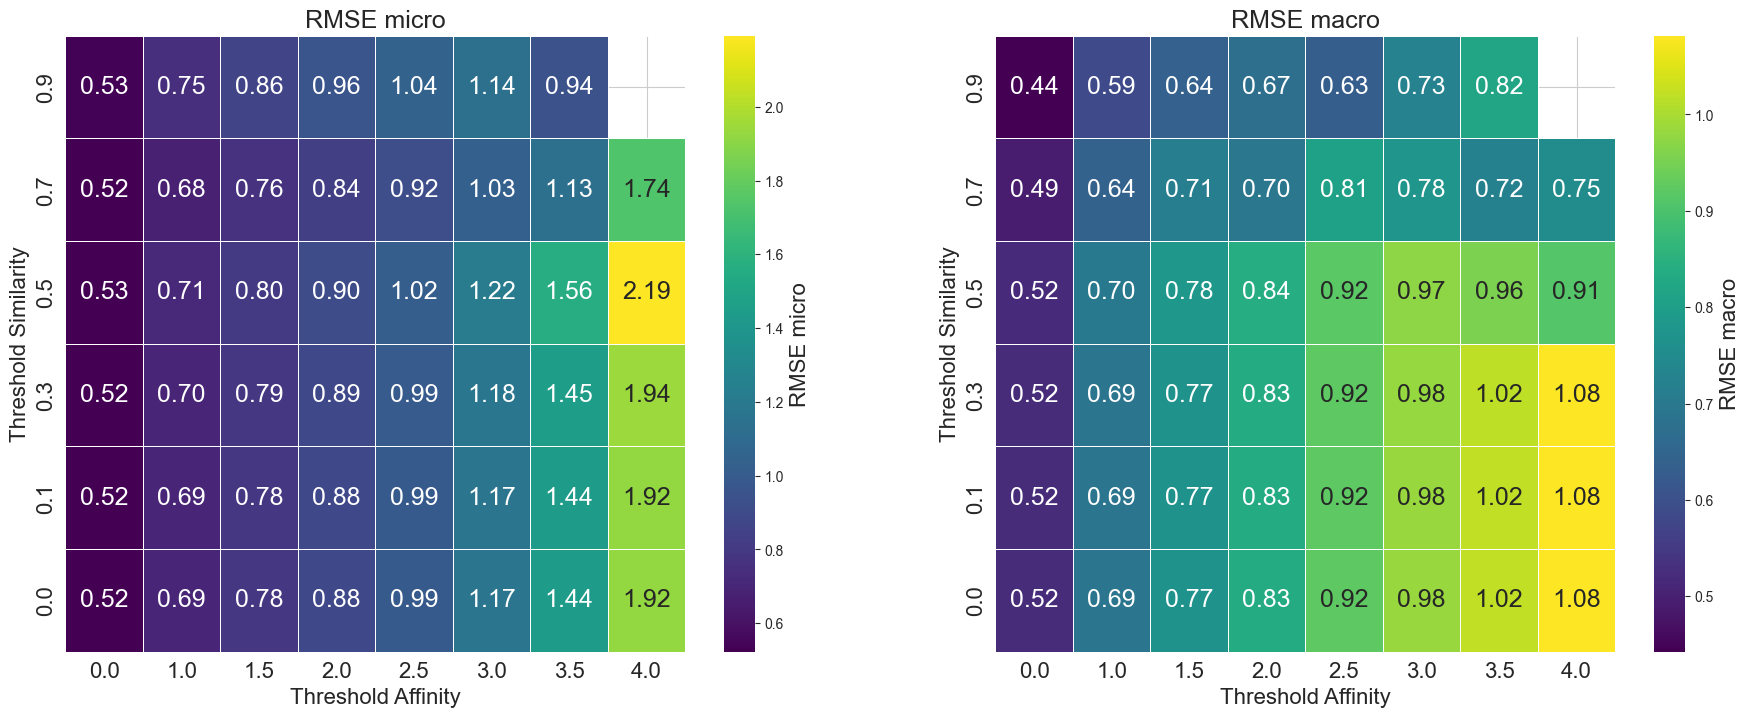

In [18]:
get_heatmap(results_kiba_best_baseline, 'both', model_name='DTI_KIBA_baseline_best', save_fig=True)

# Transfer learning
## Metrics

In [ ]:
drug_target_data = pd.read_csv('../analysis/kiba_d_t_aff_smiles_split.csv')
test_data = drug_target_data[drug_target_data['split'] == 2] 
del test_data['split']

In [ ]:
pred_nf = torch.load('../analysis/DTI_tl_nf_train_best_1504')
pred_f = torch.load('../analysis/DTI_tl_f_train_best_1504')
pred_f_el = torch.load('../analysis/DTI_tl_f_add_l_to_d_enc_train_best_1604')

In [ ]:
test_data.insert(4, 'predicted', pred_DTI_best_baseline)
test_data.to_csv('../analysis/DTI_tl_nf_train_best_1504_preds.csv', index=False)

In [ ]:
results = get_total_metrics(test_data, threshold_affinity=[0, 1, 1.5, 2, 2.5, 3, 3.5, 4], threshold_similarity=[0, 0.1, 0.3, 0.5, 0.7, 0.9])
results.to_csv('../analysis/DTI_tl_nf_train_best_1504_metrics.csv', index=False)

## Heatmaps

In [30]:
results_ws = pd.read_csv('../analysis/DTI_tl_nf_train_best_1504_metrics.csv')
results_f = pd.read_csv('../analysis/DTI_tl_f_train_best_1504_metrics.csv')
results_f_el = pd.read_csv('../analysis/DTI_tl_f_add_l_to_d_enc_train_best_1604_metrics.csv')

In [4]:
DDC_KIBA_sim_aff_diff_best_0407_1 = pd.read_csv('../analysis/DDC_KIBA_sim_aff_diff_best_0407_1_metrics.csv')

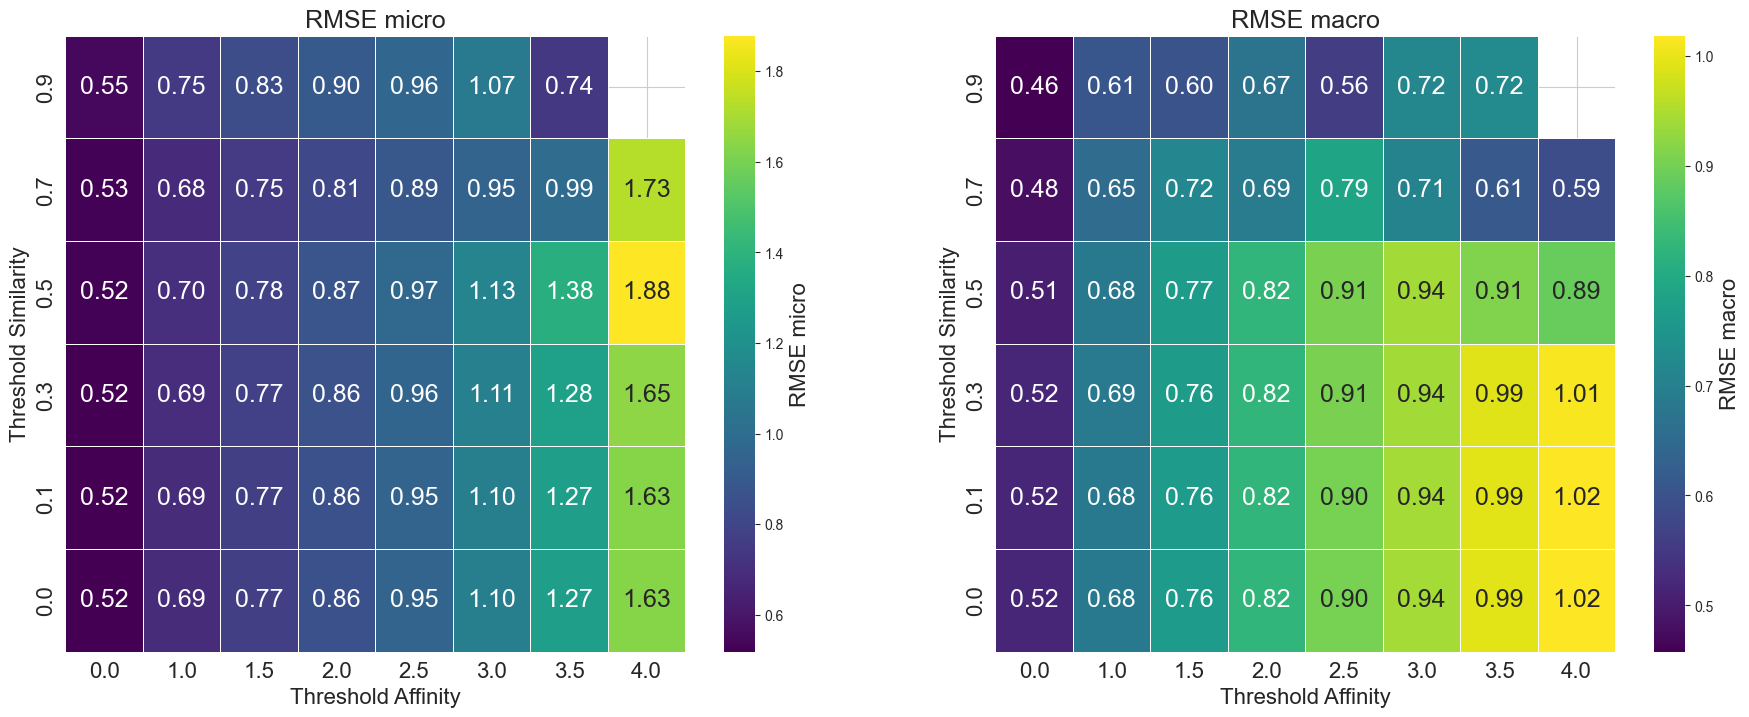

In [27]:
get_heatmap(results_ws, 'both', model_name='DTI_KIBA_TL_ws_best', save_fig=True)

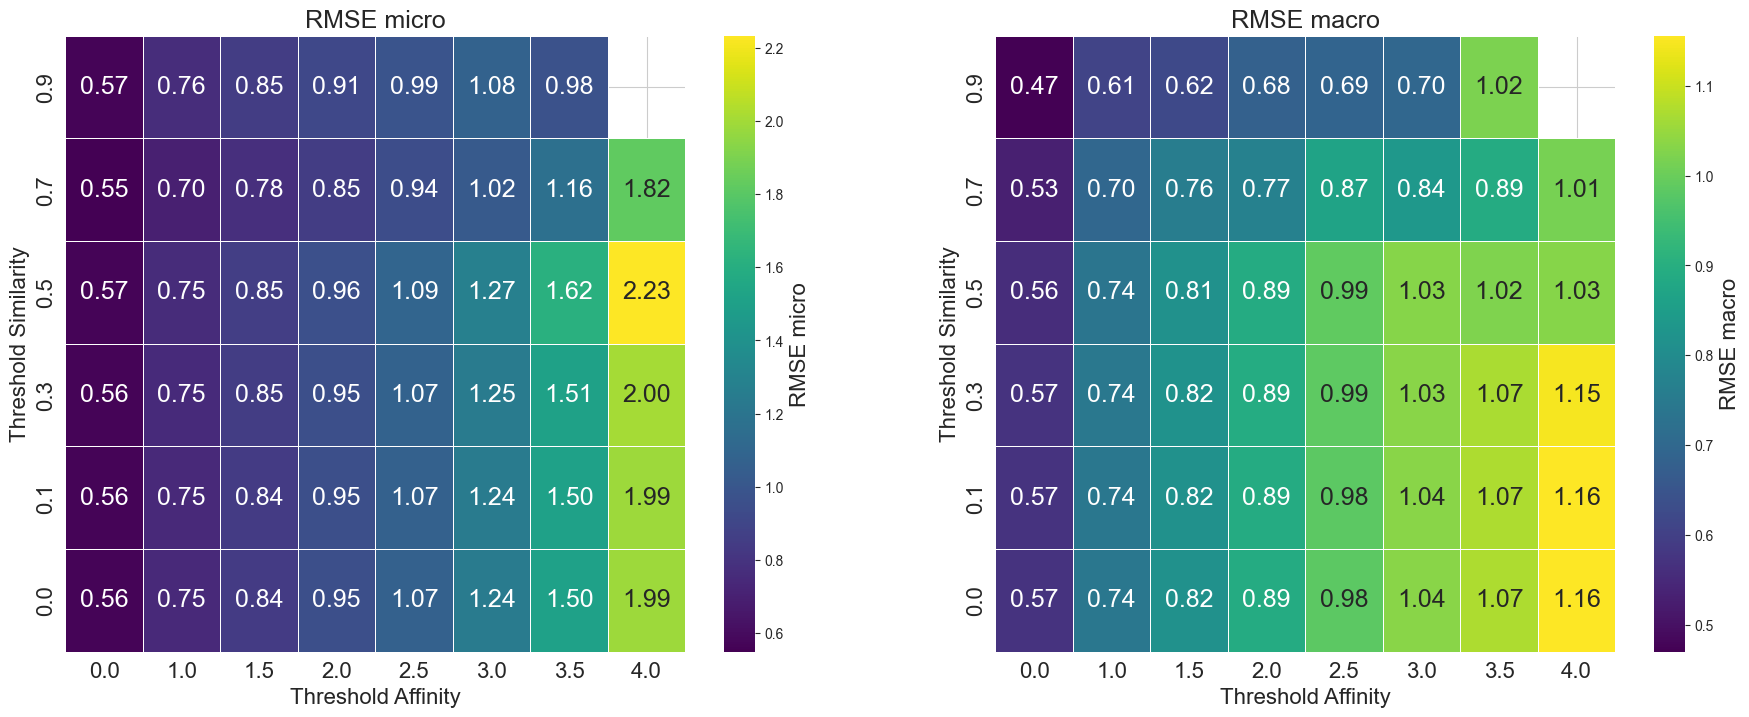

In [28]:
get_heatmap(results_f, 'both', model_name='DTI_KIBA_TL_f_best', save_fig=True)

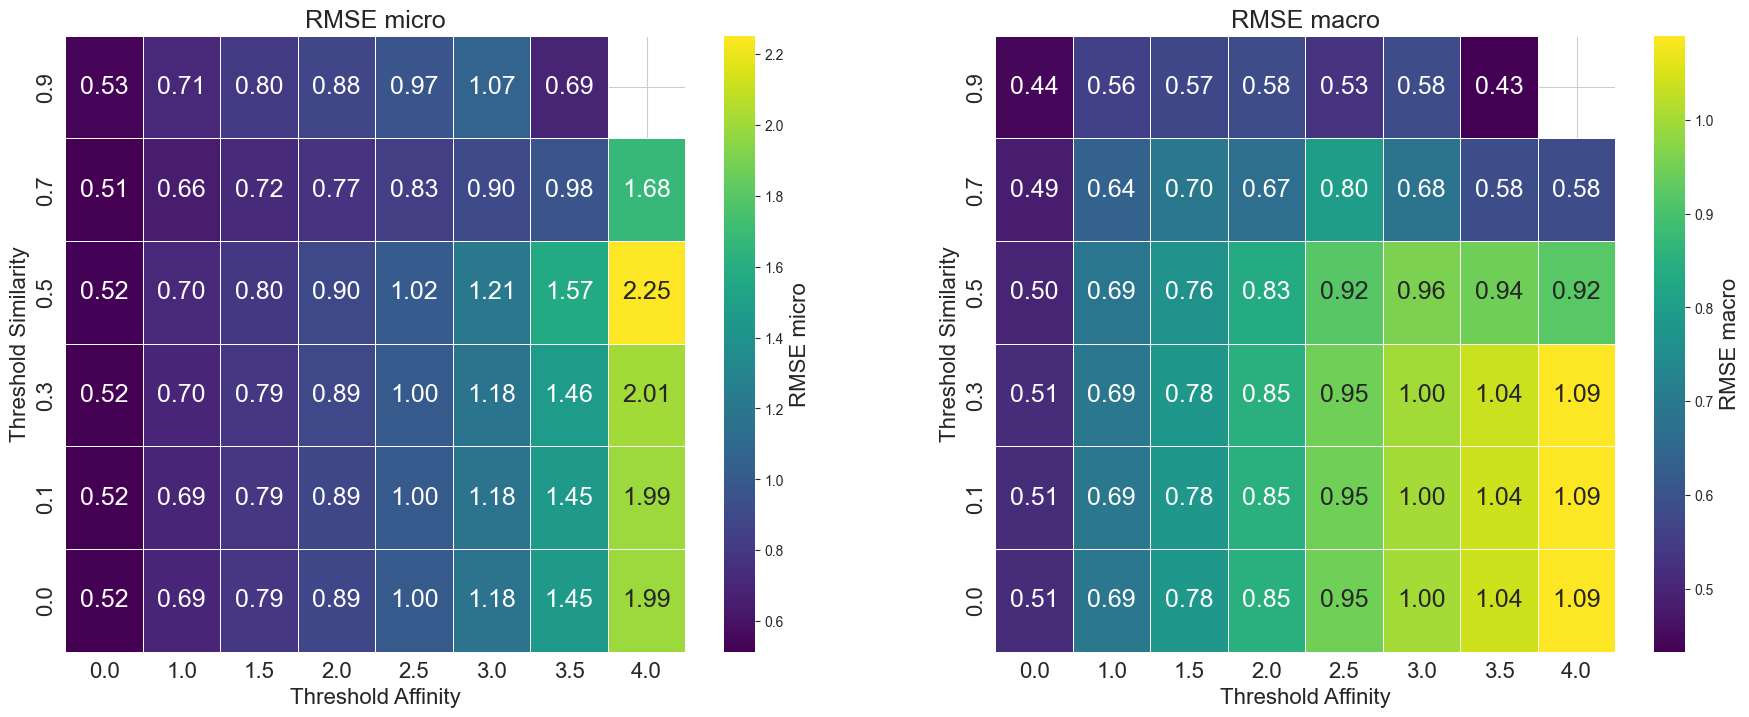

In [29]:
get_heatmap(results_f_el, 'both', model_name='DTI_KIBA_TL_f_el_best', save_fig=True)

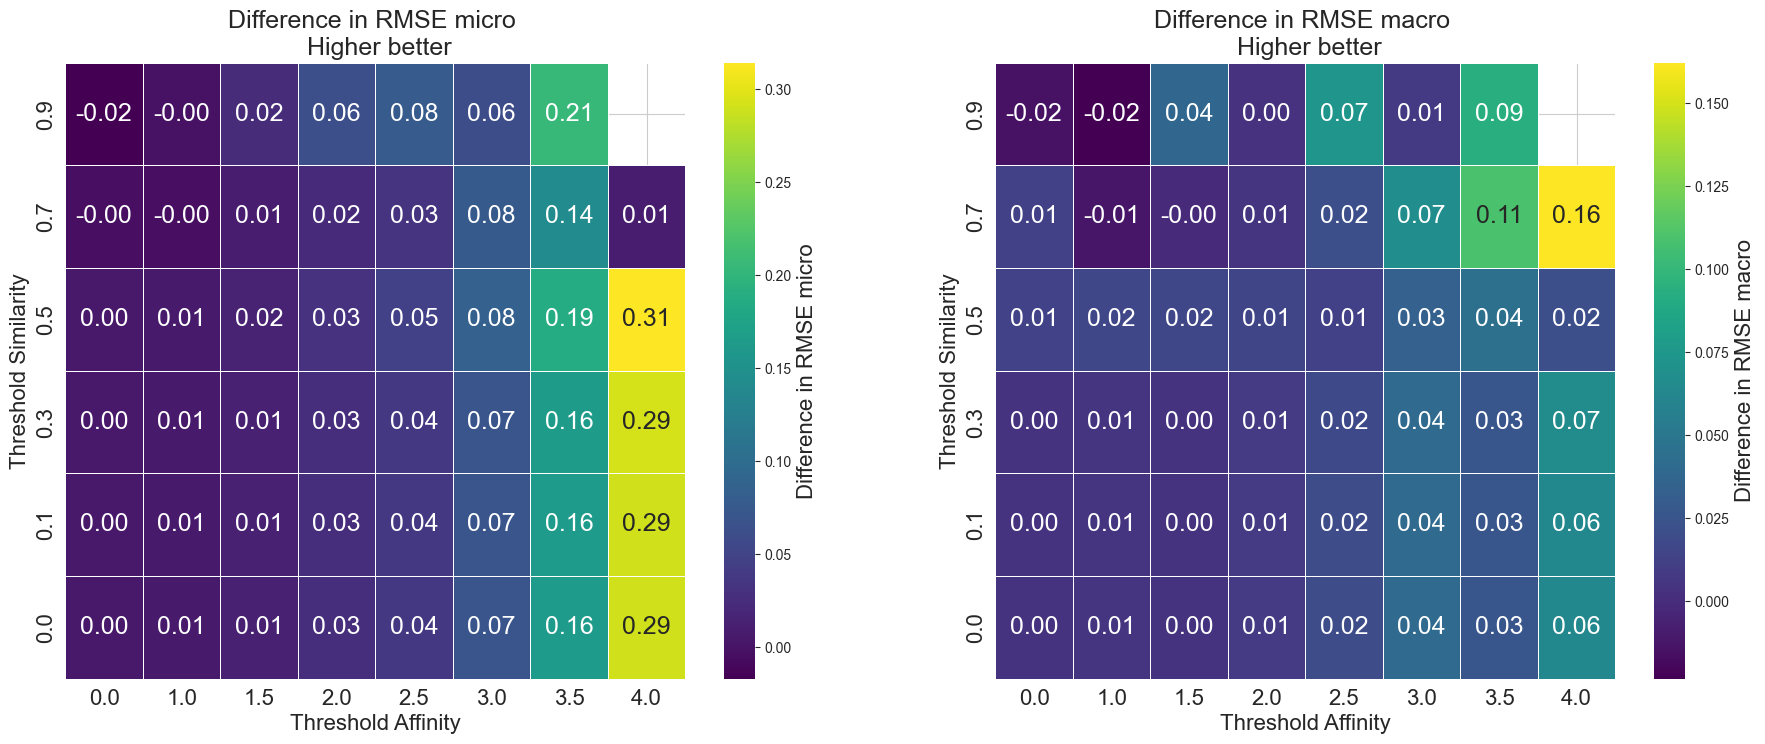

In [31]:
get_differential_heatmap(results_kiba_best_baseline, results_ws, 'both', 'DTI_KIBA_baseline_best_vs_best_TL_ws', save_fig=True)

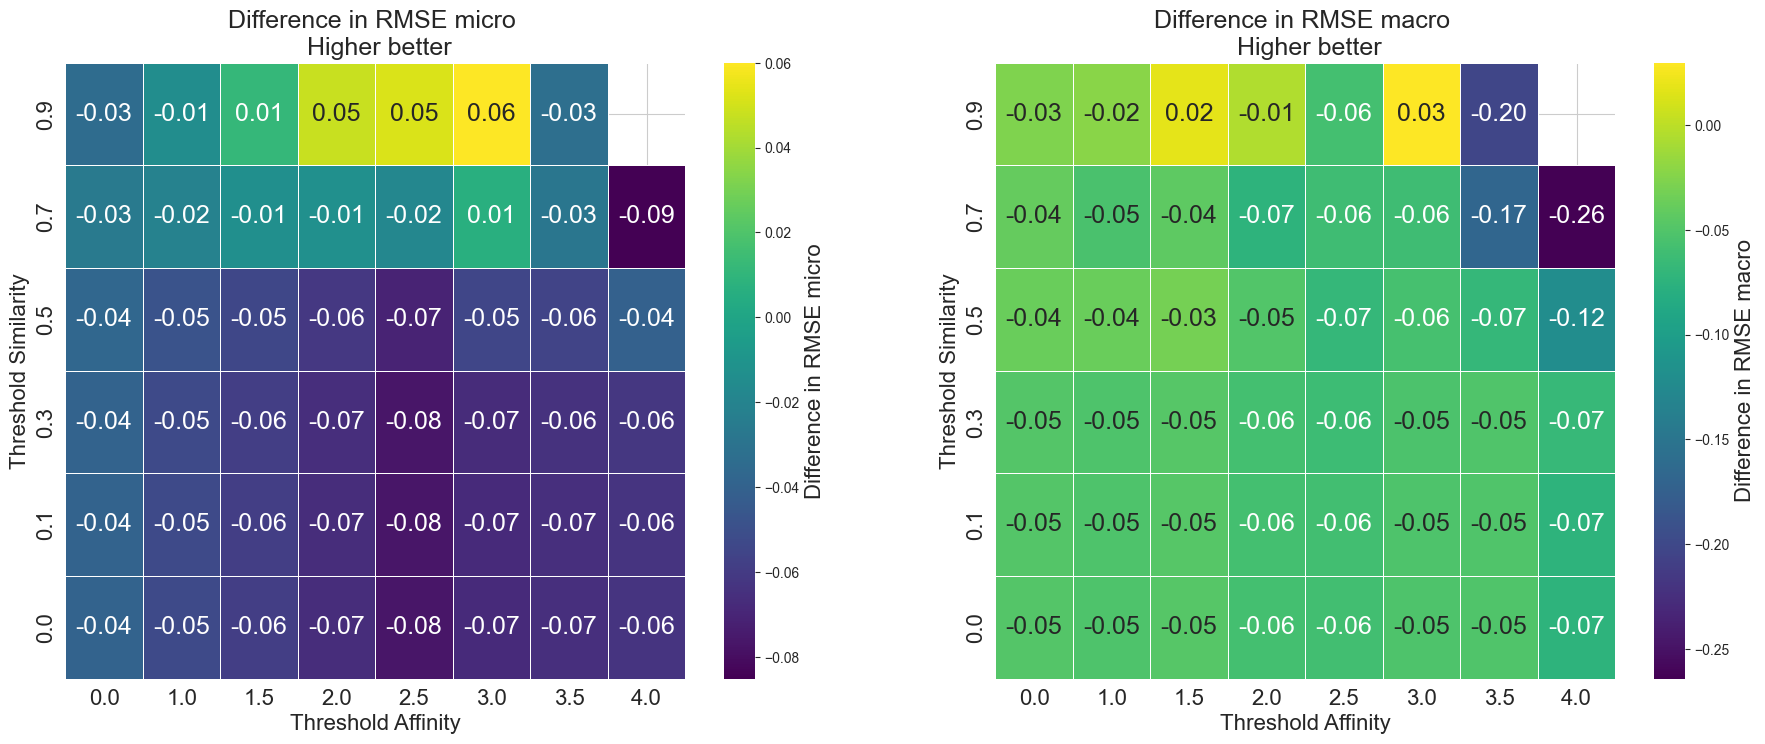

In [32]:
get_differential_heatmap(results_kiba_best_baseline, results_f, 'both', 'DTI_KIBA_baseline_best_vs_best_TL_f', save_fig=True)

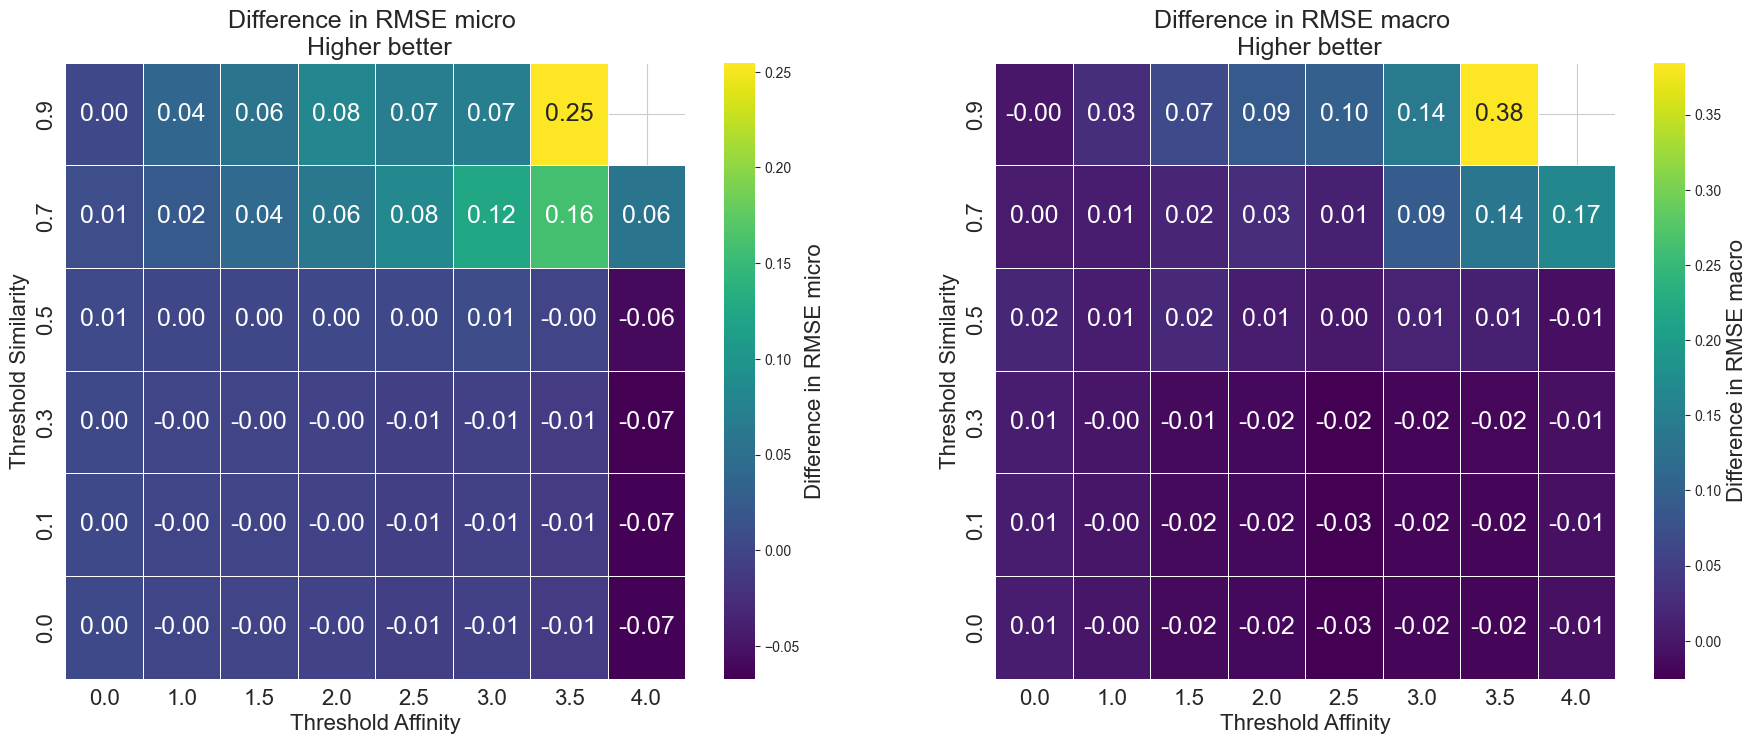

In [33]:
get_differential_heatmap(results_kiba_best_baseline, results_f_el, 'both', 'DTI_KIBA_baseline_best_vs_best_TL_f_el', save_fig=True)

## DDC regression

In [37]:
DDC_KIBA_sim_aff_diff_best_0407_1 = pd.read_csv('../analysis/DDC_KIBA_sim_aff_diff_best_0407_1_metrics.csv')

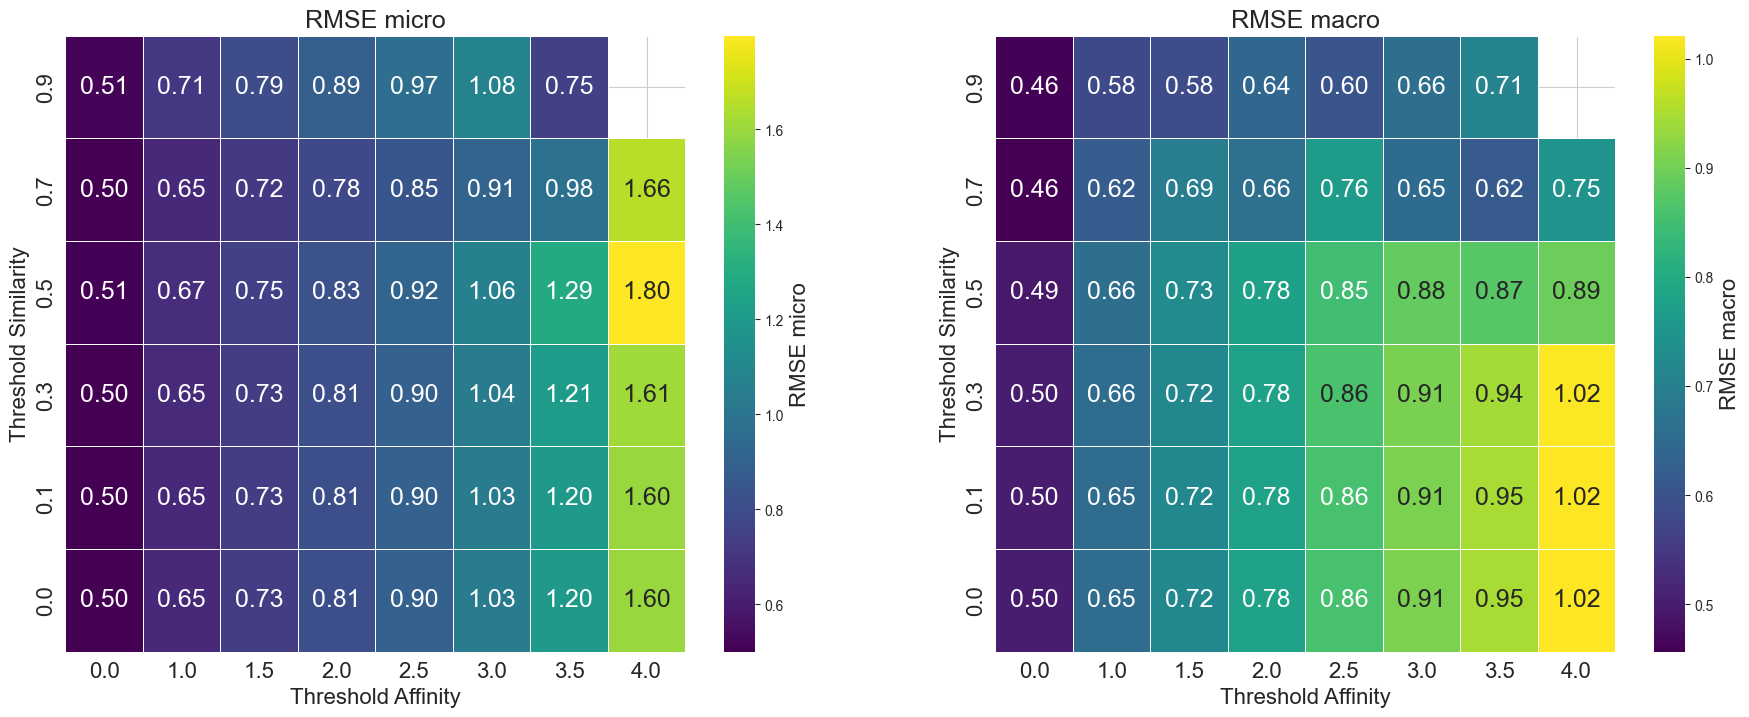

In [39]:
get_heatmap(DDC_KIBA_sim_aff_diff_best_0407_1, 'both', model_name='DTI_KIBA_TL_ws_w_t_enc_best')

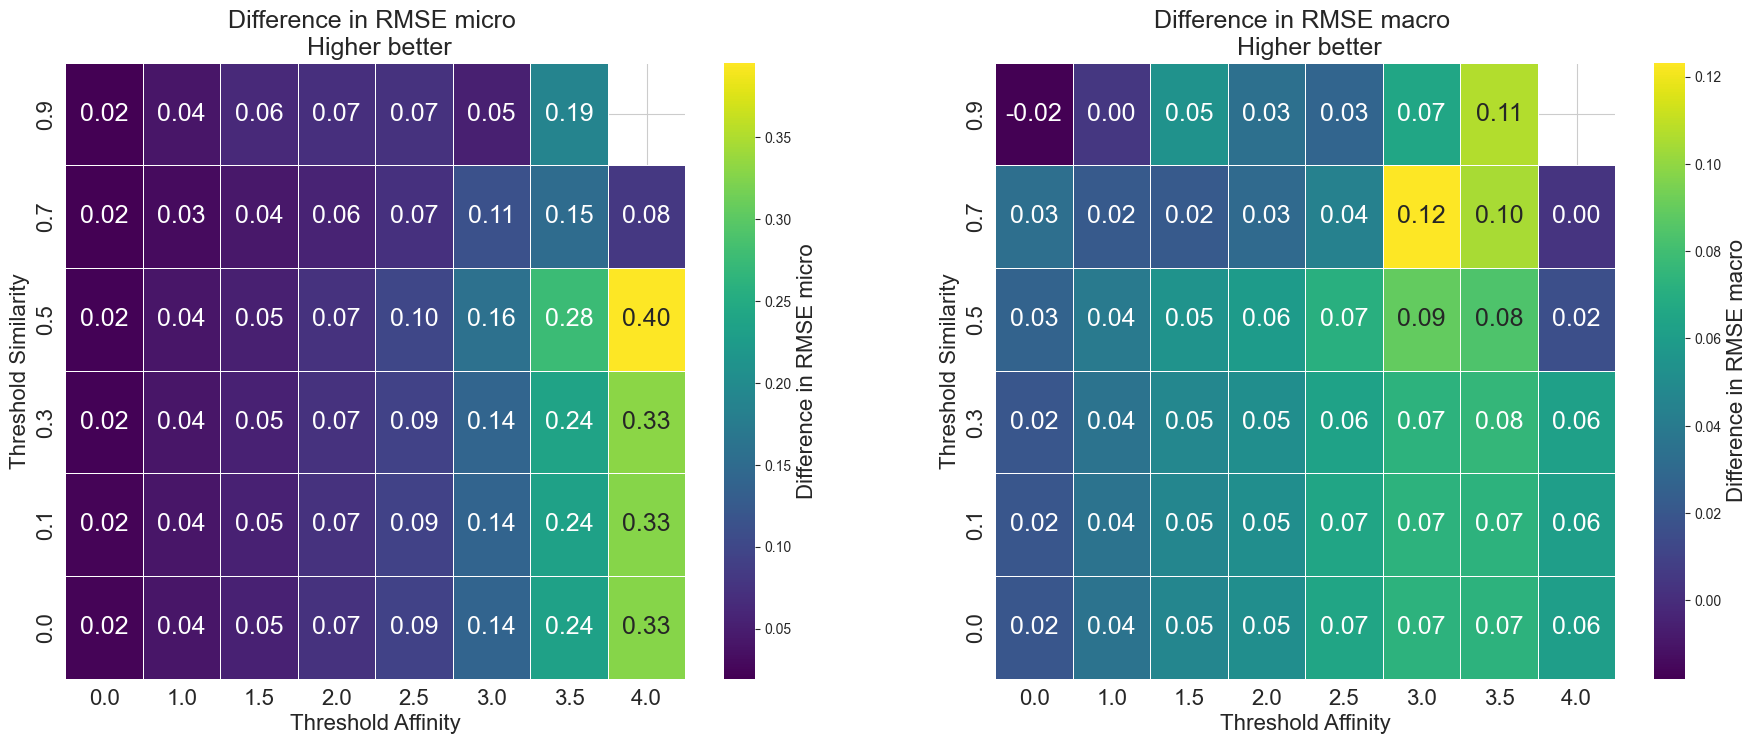

In [40]:
get_differential_heatmap(results_kiba_best_baseline, DDC_KIBA_sim_aff_diff_best_0407_1, 'both', 'DTI_KIBA_baseline_best_vs_TL_ws_w_t_enc_best')

## With t-encoder

In [34]:
DTI_KIBA_w_t_enc_best_0507_1 = pd.read_csv('../analysis/DTI_KIBA_w_t_enc_best_0507_1_metrics.csv')

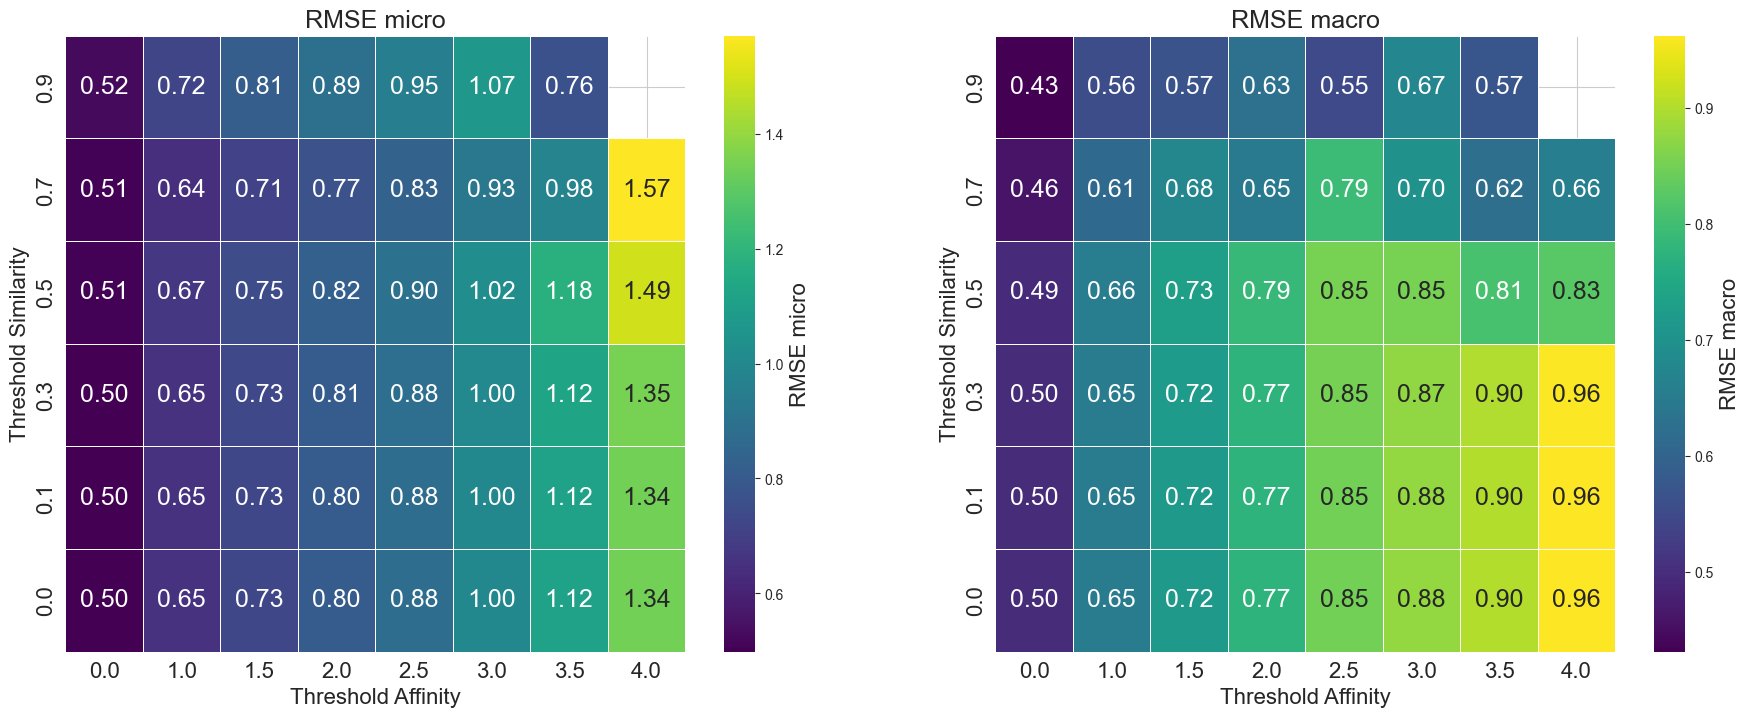

In [38]:
get_heatmap(DTI_KIBA_w_t_enc_best_0507_1, 'both', model_name='DTI_KIBA_TL_ws_w_t_enc_best')

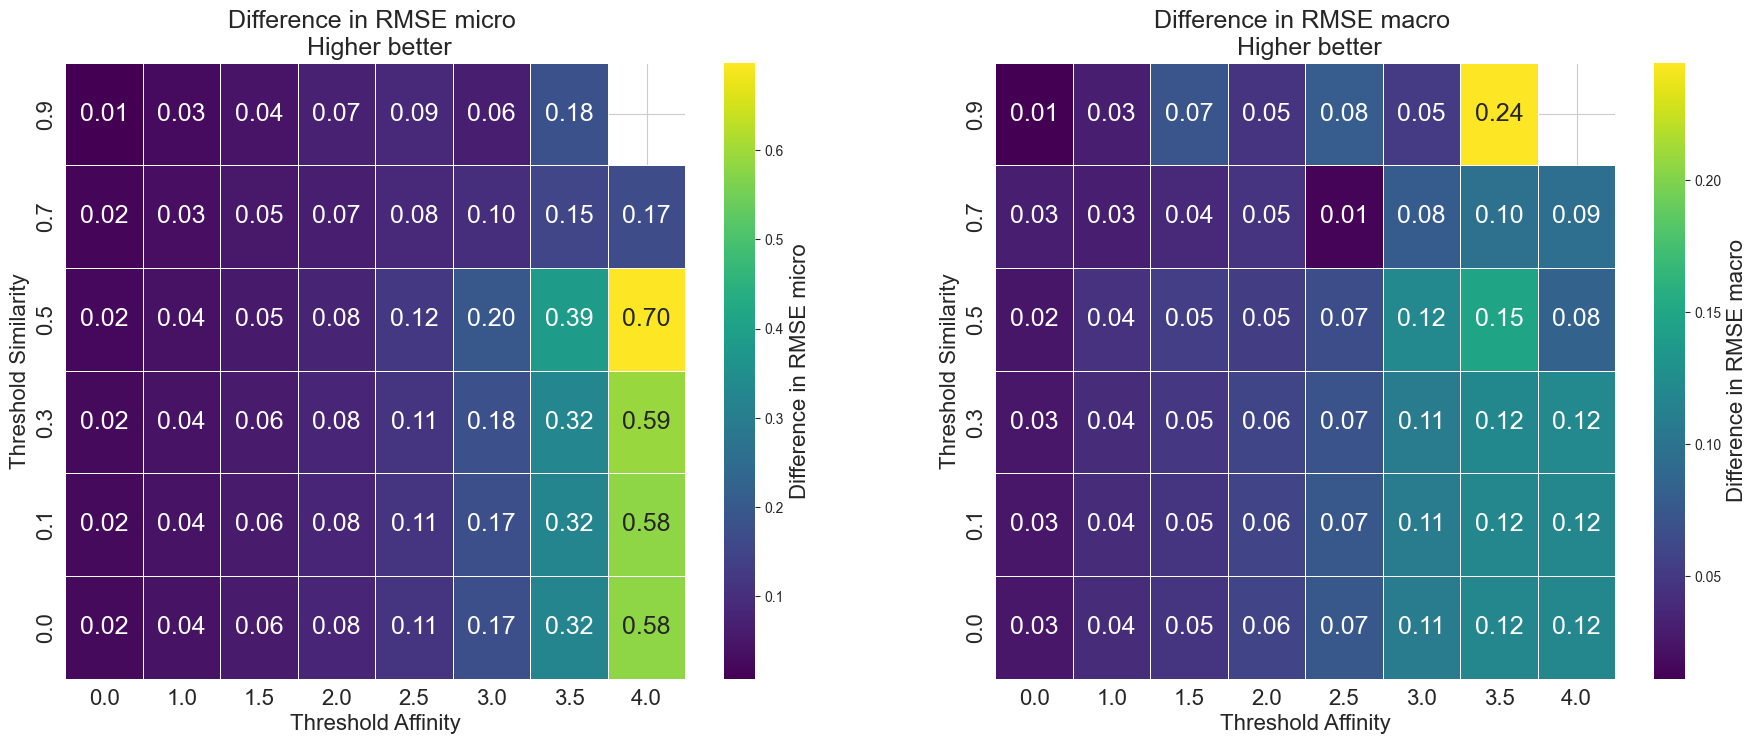

In [36]:
get_differential_heatmap(results_kiba_best_baseline, DTI_KIBA_w_t_enc_best_0507_1, 'both', 'DTI_KIBA_baseline_best_vs_best_TL_ws_t_enc')

# Top 10 transfer learning

In [ ]:
results_best_overall = pd.read_csv('../analysis/DTI_vary_all_train_best_1404_metrics.csv')

In [ ]:
results_best1_nw = pd.read_csv('../analysis/DTI_tl_best1_nw_2404_metrics-1.csv')
results_best1_w = pd.read_csv('../analysis/DTI_tl_best1_w_2404_metrics-1.csv')
results_best2_nw = pd.read_csv('../analysis/DTI_tl_best2_nw_2404_metrics.csv')
results_best2_w = pd.read_csv('../analysis/DTI_tl_best2_w_2404_metrics.csv')
results_best3_nw = pd.read_csv('../analysis/DTI_tl_best3_nw_2404_metrics.csv')
results_best3_w = pd.read_csv('../analysis/DTI_tl_best3_w_2404_metrics.csv')
results_best4_nw = pd.read_csv('../analysis/DTI_tl_best4_nw_2404_metrics.csv')
results_best4_w = pd.read_csv('../analysis/DTI_tl_best4_w_2404_metrics.csv')
results_best5_nw = pd.read_csv('../analysis/DTI_tl_best5_nw_2404_metrics.csv')
results_best5_w = pd.read_csv('../analysis/DTI_tl_best5_w_2404_metrics.csv')
results_best6_nw = pd.read_csv('../analysis/DTI_tl_best6_nw_2404_metrics.csv')
results_best6_w = pd.read_csv('../analysis/DTI_tl_best6_w_2404_metrics.csv')
results_best7_nw = pd.read_csv('../analysis/DTI_tl_best7_nw_2404_metrics.csv')
results_best7_w = pd.read_csv('../analysis/DTI_tl_best7_w_2404_metrics.csv')
results_best8_nw = pd.read_csv('../analysis/DTI_tl_best8_nw_2404_metrics.csv')
results_best8_w = pd.read_csv('../analysis/DTI_tl_best8_w_2404_metrics.csv')
results_best9_nw = pd.read_csv('../analysis/DTI_tl_best9_nw_2404_metrics.csv')
results_best9_w = pd.read_csv('../analysis/DTI_tl_best9_w_2404_metrics.csv')
results_best10_nw = pd.read_csv('../analysis/DTI_tl_best10_nw_2404_metrics.csv')
results_best10_w = pd.read_csv('../analysis/DTI_tl_best10_w_2404_metrics.csv')

In [ ]:
get_differential_heatmap(results_best_overall, results_ws, 'rmse_micro', 'DTI best configuration train from scratch vs TL (warm started)')

In [ ]:
get_combined_mean_variance_heatmap([results_best1_nw, results_best2_nw, results_best3_nw, results_best4_nw, results_best5_nw,  
                                       results_best6_nw, results_best7_nw, results_best8_nw, results_best9_nw, results_best10_nw], 
                                      [results_best1_w, results_best2_w, results_best3_w, results_best4_w, results_best5_w, 
                                       results_best6_w, results_best7_w, results_best8_w, results_best9_w, results_best10_w], 
                                      'rmse_micro', 'top10 TL best models: with and without weights')